# A simple pedestrian detector using the SVM model

In this recipe, you will learn how to detect pedestrians using a pre-trained **SVM** model with **HOG** features. Pedestrian detection is an important component of many **Advanced Driver Assistance Solutions (ADAS)**. Pedestrian detection is also used in video surveillance systems, and many other computer vision applications.

OpenCV implements the **Histogram-of-Oriented-Gradients (HOG)** descriptor computation functionality in the class `cv2.HOGDescriptor`. The same class can be used for object detection using a linear SVM model. In fact, it already has a pre-trained pedestrian detector model with weights. The model can be obtained through the method `cv2.HOGDescriptor.getDefaultPeopleDetector`. Objects are detected using the sliding window approach at multiple scales, using the method `hog.detectMultiScale`. The function returns a list of locations of detected people, and each detection score. To know more visit https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S04\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s04\env

d:\html_doc\program\opencv\packt\s04\env\lib\site-packages
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  image--------------------    Shape(425, 640, 3) image: uint8
[ [183 184 180] [220 219 215] [247 244 240] [239 235 230] [248 244 239] [242 239 234] [212 210 210] ]


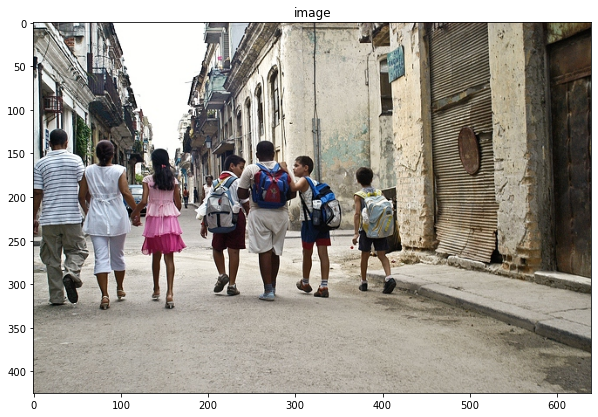

In [2]:
# Load the test image
image = cv2.imread('../data/people.jpg')



##########################################################
print_image('image','image',image,0,1,0,7)
plt_view_image(plt,[["image",image[:,:,[2,1,0]] ]], figsize=(10,8), axis='on', cmap='gray')

cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

# [Поиск людей на фотографиях на Android с помощью OpenCV](https://habr.com/en/post/217377/)

статический метод объекта HOGDescriptor.detectMultiScale (в который предварительно добавляем стандартный детектор человеческих контуров из метода HOGDescriptor.getDefaultPeopleDetector). После вызова, в переменной locations будут содержаться объекты прямоугольных областей нахождения людей (x, y, width, height), а в weights — релевантность поиска (но, как показала практика, она не совсем отвечает действительности при таких изображениях).

На выходе получаем bitmap с наложенными на него областями предположительного нахождения людей, весом данного результата поиска и некой дополнительной информацией.

библиотека более предназначена для определения фото\видео с камер наблюдения, где можно выделить объект и подтвердить его следующими кадрами, а для фотографий, с заранее неизвестными планами, дает достаточно большую ошибку распознавания(можно фильтровать по весу, но тогда рискуем потерять много образов). Скорость анализа изображения пока не позволяет использовать OpenCV для большого количества фотографий, да и при работе в режиме реального времени, на данных мощностях и алгоритмах, может не успевать за потоком кадров.

# [Обнаружение автомобильных номеров в видео с помощью классификатора SVM и декскриптора HOG](https://delirium-00.livejournal.com/1872.html)

Сегодня я приведу и прокомментирую решение задачи классификации одного объекта с использованием метода опорных векторов(англ. SVM - support vector machines). Обучим классификатор и применим его методом скользящего окна к кадрам видео. В качестве вектора признаков, описывающего объект, возьмем значения дескриптора HOG (гистограмма ориентированных градиентов, англ. Histogram of Oriented Gradients). Реализация, как всегда, на с++ с использованием библиотеки компьютерного зрения OpenCV.

Алгоритм HOG основан на разбиении изображения на определенное число зон и подсчете в каждой зоне преобладающего направления градиентов. В OpenCV  алгоритм дескриптор HOG реализован в виде класса HOGDescriptor.

При запуске программы предлагается на выбор два режима работы: режим обучения и режим обнаружения. В режиме обучения находятся файлы изображений объектов и фона в соответствующих каталогах "object" и "background". От каждого вычисляется дескриптор HOG, предварительно изображения масштабируются до нужного размера. Из векторов, образованных этими дескрипторами составлятся матрица данных, которая подается на вход метода Train.

В режиме обнаружения считываются видеофайлы из папки "test". На каждом кадре видео работает метод скользящего окна с перекрытием 50% и с масштабами, начиная от минимального, от которого вычисляется дескриптор, и все кратные ему, но меньшие размера кадра. Для каждого окна вычисляется дескриптор HOG и отправляется на вход метода predict классификатора. В случае обнаружения объекта, контур окна выделяется зеленым прямоугольником на кадре.

Чтобы уменьшить количество ошибок, нужно во-первых увеличить обучающую выборку, например, размножив уже существующие изображения, применив к ним различные перспективные преобразования. Во-вторых, необходимо применить технику бутстрэппинга. То есть, переобучить классификатор, добавив в выборку ложно распознанный фон. Эти сложные случаи образуют новые опорные вектора, что позволит построить разделяющую гиперплоскость более точно.

Алгоритм работает довольно медленно. Чтобы ускорить, можно выделить простые признаки (детектор Харриса, тот же HOG, но меньшей размерности) и применить каскадную схему, и распараллелить.

# [поиск людей, HOG](http://www.compvision.ru/forum/index.php?/topic/1540-%D0%BF%D0%BE%D0%B8%D1%81%D0%BA-%D0%BB%D1%8E%D0%B4%D0%B5%D0%B9-hog/)

HOG - это не просто магическая штука, а классифиикатор обученный на вполне конкретных данных. Чтобы он хорошо работал на данных, отличных от тех, на которых его обучали, его надо переобучить. Что логично.

Так вот: модели, входящие в пооставку OpenCV, обучены на данных полученных с камеры, находящейся практически на уровне земли. Разработаны они были изначально для камер, установленных в автомобиле для предотвращения столкновения с пешеходами. Ты же подаёшь изображения с камеры, установленной достаточно высоко. Логично, что результаты плачевны, ведь искажаются пропорции человечского тела.

Тебе надо переобучить модель на своих данных либо найти гововую. И подавать на классиифиикатор вместо вызова getDefaultPeopleDetector().

#### [Object Detection](https://docs.opencv.org/2.4/modules/gpu/doc/object_detection.html#gpu-hogdescriptor-hogdescriptor)
HOGDescriptor(Size __win_size__=Size(64, 128), Size __block_size__=Size(16, 16), Size __block_stride__=Size(8, 8), Size __cell_size__=Size(8, 8), int __nbins__=9, double __win_sigma__=DEFAULT_WIN_SIGMA, double __threshold_L2hys__=0.2, bool __gamma_correction__=true, int __nlevels__=DEFAULT_NLEVELS)

#### [Histogram of Oriented Gradients](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html)

The Histogram of Oriented Gradient (HOG) feature descriptor is popular for object detection 1.
In the following example, we compute the HOG descriptor and display a visualisation.

# [2.3. Метод бегущего окна и HOG-детектор](https://www.intuit.ru/studies/courses/10622/1106/lecture/18036?page=3)

В данном разделе рассматривается использование HOG-признаков для детектирования объектов на изображении. Однако сначала рассмотрим, каким образом можно решить задачу классификации изображений при помощи HOG-дескриптора. Пусть нам требуется определить, является ли заданное изображение изображением пешехода или нет. Другими словами, мы хотим классифицировать изображения на те, которые содержат искомый объект (пешехода), и не содержат его. Для этого, мы можем поставить в соответствие изображению его признаковое описание, полученное с помощью HOG, а затем использовать алгоритмы машинного обучения, для непосредственного осуществления классификации. Поскольку большинство алгоритмов обучения с учителем работают в пространстве признаков фиксированной размерности, вектора HOG-признаков для различных изображений должны быть одинаковой длины, а, следовательно, классифицируемые изображения должны быть одинакового размера. Более того, для обеспечения приемлемого качества решения данной задачи предполагается, что данные изображения содержат объекты одинаковых (близких) размеров, которые занимают одну и ту же область изображения.

### HOGDescriptor

```python
public HOGDescriptor()

public HOGDescriptor(Size win_size  =Size(64, 128),
                     Size block_size=Size(16, 16),
                     Size block_stride=Size(8, 8),
                     Size cell_size=Size(8, 8),
                     int nbins=9)

public HOGDescriptor(Size win_size  =Size(64, 128),
                     Size block_size=Size(16, 16),
                     Size block_stride=Size(8, 8),
                     Size cell_size=Size(8, 8),
                     int nbins=9,
                     int _derivAperture,
                     double win_sigma=DEFAULT_WIN_SIGMA,
                     int _histogramNormType,
                     double threshold_L2hys=0.2,
                     bool gamma_correction=true,
                     int nlevels=DEFAULT_NLEVELS,
                     boolean _signedGradient)
```

* __winSize__ – размер изображения, для которого требуется вычислить HOG-описание. В терминах детектора объектов это размеры бегущего окна (описание HOG-детектора, основанного на методе бегущего окна, см. ниже).
* __blockSize__ – размер блока в пикселях.
* __blockStride__ – шаг сетки блоков.
* __cellSize__ – размер ячейки в пикселях. Размер блока должен быть кратен размеру ячейки.
* __nbins__ – количество полос в гистограмме ориентации градиентов, соответствующей одной ячейке.
* __derivAperture__ – в текущей версии OpenCV реализация HOG не использует данный параметр.
* __winSigma__ – величина стандартного отклонения, определяющая гауссиан для взвешивания вкладов магнитуд градиентов в гистограммы: градиенты в пикселях, находящихся ближе к центру блока дают больший вклад. Заданное по умолчанию значение __winSigma__=-1 означает, что данное стандартное отклонение будет вычислено как $(blockSize.width + blockSize.height)/8$.
* __histogramNormType__ – определяет каким образом осуществляется нормализация вектора признаков блока. В настоящий момент поддерживается только алгоритм __HOGDescriptor::L2Hys__, который заключается в нормализации вектора по $L_2$-метрике, замене компонент полученного вектора, превышающих __L2HysThreshold__, на данное пороговое значение, и повторной нормализации по $L_2$-метрике.
* __L2HysThreshold__ – пороговое значение, используемое при нормализации HOG-описания блока. 
* __gammaCorrection__ – определяет будет ли выполнена гаммакоррекция изображения перед вычислением признаков. В случае, если __gammaCorrection=true__, интенсивность каждого пикселя обработанного изображения будет равняться корню из его исходной интенсивности.
* __nlevels__ – максимальное количество масштабов изображения, используемых при осуществлении детектирования объектов различных размеров.


### compute

Метод __compute__ класса __HOGDescriptor__ позволяет извлекать признаки всех или некоторых окон детектирования для заданного изображения:

```C++
void compute(const Mat& img, 
     vector<float>& descriptors, 
     Size winStride=Size(), 
     Size padding=Size(), 
     const vector<Point>amp; locations=vector<Point>()) const;
```

* __img__ – изображение, матрица типа CV_8UC1 или CV_8UC3. Во втором случае в каждой точке градиент вычисляется независимо по каждому каналу, и из них выбирается вектор наибольшей длины.
* __descriptors__ – вектор, в который последовательно будут записаны признаковые описания заданных окон детектирования.
* __winStride__ – шаг окна детектирования по горизонтали и вертикали. По умолчанию используется __winStride__, равный размеру ячейки HOG.
* __padding__ – размер рамки, добавляемой к изображению. Перед запуском метода бегущего окна вокруг (справа, сверху, слева, снизу) изображения может быть сгенерирована рамка, прежде всего, с целью обеспечения возможности поиска частично видимых объектов на границе изображения. Размер границы будет выровнен до размеров кратным наибольшему общему делителю шага окна детектирования и размера блока HOG по соответствующему направлению. Плюс к этому будет добавлена рамка в один пиксель, для вычисления градиента в граничных пикселях. Генерация данной рамки производится путем отражения пикселей изображения, т.е., например, если значения цвета пикселей изображения обозначить за abcdefg, то изображение с рамкой слева и справа будет выглядеть следующим образом: gfedcb|abcdefg|fedcba.
* __locations__ – положения окон детектирования, для которых требуется вычислить векторы HOG-признаков. По умолчанию признаки вычисляются для всех окон.


### setSVMDetector
В OpenCV реализован HOG-детектор, использующий в качестве классификатора машину опорных векторов с линейным ядром. Обученный линейный SVM-классификатор представляется вектором коэффициентов уравнения разделяющей гиперплоскости в пространстве признаков. Перед тем, как осуществлять детектирование необходимо с помощью метода __setSVMDetector__ задать используемую модель классификатора:

```C++
void setSVMDetector(InputArray svmdetector);
```
* __svmdetector__ – матрица-вектор, содержащая коэффициенты разделяющей гиперплоскости. Длина вектора должна либо быть на единицу больше длины HOG-дескриптора одного окна детектирования, либо равняться ей. В первом случае последним элементом svmdetector является значение свободного члена. 

Библиотека OpenCV содержит обученные для решения задачи детектирования пешеходов линейные SVM-модели, которые можно получить с помощью методов 
* __getDefaultPeopleDetector__(обучена на базе INRIA [4, 9], размер окна детектирования 64x128) 
* __getDaimlerPeopleDetector__ (обучена на базе Daimler [5, 10], размер окна детектирования 48x96).

### detect

Для непосредственного детектирования объектов фиксированного размера (т.е. без использования масштабирования изображения) служит метод __detect__:

```C++
void detect(const Mat& img, 
      vector<Point>& foundLocations, 
      vector<double>& weights, 
      double hitThreshold=0, 
      Size winStride=Size(), 
      Size padding=Size(), 
      const vector<Point>& searchLocations=vector<Point>() 
     ) const;
```
* __img__ – изображение, матрица типа CV_8UC1 или CV_8UC3 .
* __foundLocations__ – координаты верхних левых углов окон детектирования, классифицированных как содержащие объект (срабатываний детектора).
* __weights__ – веса, присвоенные классификатором срабатываниям детектора (пропорциональны расстоянию признакового вектора от разделяющей SVM-гиперплоскости). Можно трактовать данный параметр, как числовую характеристику надежности решения соответствующей задачи классификации: большие значения обозначают большую надежность.
* __hitThreshold__ – минимальное значение веса (см. параметр weights), при котором происходит срабатывание детектора.

My personal opinion is that you shouldn’t bother playing around this parameter unless you are seeing an extremely high rate of false-positive detections in your image. In that case, it might be worth trying to set this parameter. Otherwise, just let non-maxima suppression take care of any overlapping bounding boxes, as we did in the previous lesson.

* __winStride__ – шаг окна детектирования по горизонтали и вертикали.

Both winStride and scale are extremely important parameters that need to be set properly. These parameter have tremendous implications on not only the accuracy of your detector, but also the speed in which your detector runs.

At each stop of the sliding window (and for each level of the image pyramid, discussed in the scale section below), we (1) extract HOG features and (2) pass these features on to our Linear SVM for classification. The process of feature extraction and classifier decision is an expensive one, so we would prefer to evaluate as little windows as possible if our intention is to run our Python script in near real-time.

* __padding__ – размер рамки, добавляемой к изображению.

As suggested by Dalal and Triggs in their 2005 CVPR paper, Histogram of Oriented Gradients for Human Detection, adding a bit of padding surrounding the image ROI prior to HOG feature extraction and classification can actually increase the accuracy of your detector.

Typical values for padding include (8, 8), (16, 16), (24, 24), and (32, 32).

* __searchLocations__ – положения окон детектирования, по умолчанию используются все.

#### [HOG detectMultiScale parameters explained](https://www.pyimagesearch.com/2015/11/16/hog-detectmultiscale-parameters-explained/)

```python
detectMultiScale(img[, hitThreshold[, winStride[, padding[, scale[, finalThreshold[, useMeanshiftGrouping]]]]]]) -> foundLocations, foundWeights
```

### detectMultiScale

Для детектирования объектов различного размера (путем масштабирования изображения) предназначен метод __detectMultiScale__ :

```C++
void detectMultiScale(const Mat& img, 
                      vector<Rect>& foundLocations, 
                      vector<double>& foundWeights, 
                      double hitThreshold=0, 
                      Size winStride=Size(), 
                      Size padding=Size(), 
                      double scale=1.05, 
                      double finalThreshold=2.0, 
                      bool useMeanshiftGrouping=false) const; 
```                
Параметры __img, foundLocations, foundWeights, hitThreshold, winStride, padding__ по смыслу совпадают с аналогичными параметрами метода __detect__

* __scale__ – мультипликативный шаг изменения масштаба. Исходное изображение последовательно уменьшается в $1$,$scale$,$scale^2$,$...$,$scale^t$ , $...$, раз, тем самым позволяя осуществлять детектирование более мелких объектов с использованием той же SVM-модели. Масштабирование прекращается либо в том случае, когда полученное изображение хотя бы по одному измерению становится меньше окна детектирования, либо по совершению __nlevels__ (см. параметры конструктора класса __HOGDescriptor__) итераций.

Image pyramid the image is downsized and (optionally) smoothed via a Gaussian filter.
This scale parameter controls the factor in which our image is resized at each layer of the image pyramid, ultimately influencing the number of levels in the image pyramid.

* __finalThreshold__ – параметр группировки (non-maximum suppression) срабатываний детектора на всех рассматриваемых масштабах. Значение данного параметра зависит от типа используемой группировки.

* __useMeanshiftGrouping__ – параметр, определяющий использовать ли группировку методом сдвига среднего (Mean Shift), или группировку на основе разбиения на классы эквивалентности. В связи с тем, что при использовании малого шага по масштабу возможны случаи, когда объект будет продетектирован несколько раз на различных масштабах. Следует отметить, что подобная ситуация возможна и при детектировании с малыми шагами окна на одном масштабе. Для того чтобы исключить множественные срабатывания детектора на один и тот же объект применяется группировка. В случае если useMeanshiftGrouping=false выполняется разбиение множества срабатываний детектора на классы эквивалентности. Эквивалентными считаются два прямоугольника $r_1$ и $r_2$ , у которых координаты углов отличаются меньше, чем на $0.1(min(r_1.width,r_2.width)+(min(r_1.height,r_2.height))$. Затем, в классах, в которые попало больше чем __finalThreshold__ прямоугольников, вычисляются "типичные представители", путем усреднения координат углов. Полученные прямоугольники фильтруются так, чтобы исключить ситуации, когда маленький прямоугольник находится в большом. На этом фильтрация считается выполненной. Метод сдвига среднего заключается в восстановлении плотности распределения точек в трехмерном пространстве (координаты центра прямоугольника и масштаб) с помощью ядерной оценки и нахождении максимумов плотности. В результате получается набор прямоугольников соответствующих максимумам и назначенных им весов. Все прямоугольники с весом меньшим или равным __finalThreshold__ отсеиваются.

This value defaults to False  and in my opinion, should never be set to True  — use non-maxima suppression instead; you’ll get much better results.

In [3]:
#Implementation of HOG (Histogram of Oriented Gradients) descriptor and object detector.
# Create the HOG feature computer and detector
hog = cv2.HOGDescriptor()

#Returns coefficients of the classifier trained for people detection (for default window size).
#C++: static vector<float> gpu::HOGDescriptor::getDefaultPeopleDetector()
#
# Получаем стандартный определитель людей и устанавливаем его нашему дескриптору
# Sets coefficients for the linear SVM classifier
hog.setSVMDetector(cv2.HOGDescriptor.getDefaultPeopleDetector())

# Detect the people in the image
foundLocations, foundWeights = hog.detectMultiScale(image)

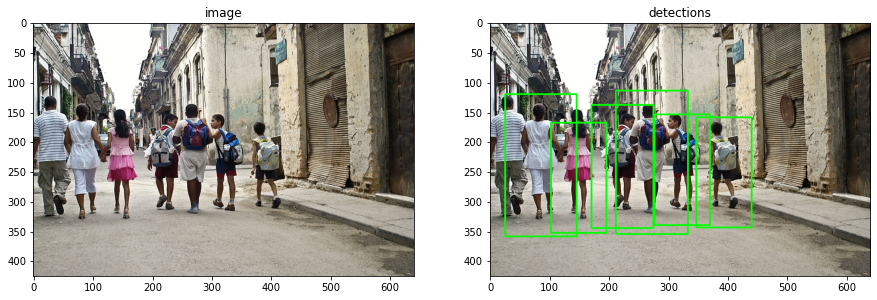

In [4]:
# Draw the detected people bounding boxes
dbg_image = image.copy()
for loc in foundLocations:
    cv2.rectangle(dbg_image, (loc[0], loc[1]), (loc[0]+loc[2], loc[1]+loc[3]), (0, 255, 0), 2)


    

##########################################################
# Visualize the results
plt_view_image(plt,[["image",image[:,:,[2,1,0]] ],
                    ["detections",dbg_image[:,:,[2,1,0]]]  ],
               figsize=(15,8), axis='on', cmap='gray'
              )

cv2.imshow('image, detections', np.hstack([image, dbg_image]))
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
print(help(cv2.HOGDescriptor().detectMultiScale))

Help on built-in function detectMultiScale:

detectMultiScale(...) method of cv2.HOGDescriptor instance
    detectMultiScale(img[, hitThreshold[, winStride[, padding[, scale[, finalThreshold[, useMeanshiftGrouping]]]]]]) -> foundLocations, foundWeights
    .   @brief Detects objects of different sizes in the input image. The detected objects are returned as a list
    .       of rectangles.
    .       @param img Matrix of the type CV_8U or CV_8UC3 containing an image where objects are detected.
    .       @param foundLocations Vector of rectangles where each rectangle contains the detected object.
    .       @param foundWeights Vector that will contain confidence values for each detected object.
    .       @param hitThreshold Threshold for the distance between features and SVM classifying plane.
    .       Usually it is 0 and should be specified in the detector coefficients (as the last free coefficient).
    .       But if the free coefficient is omitted (which is allowed), you c